## Unit 3- Statistics for Data Science

### Lesson 3, Section 7- Drill and Practice

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

%matplotlib inline

In [17]:
from scipy.stats import ttest_ind

In [88]:
def sampling(_pop1, _pop2, n, plot):
    sample1 = np.random.choice(_pop1, n, replace = True)
    sample2 = np.random.choice(_pop2, n, replace = True)
    
    if plot == 'y':
        plt.hist(sample1, alpha=.4, label='sample1')
        plt.hist(sample2, alpha=.4, label='sample2')
        plt.title('random samples, n=100')
        plt.legend(loc = 'upper right')

        print('mu_1=', sample1.mean(), '\t sigma_1=', sample1.std())
        print('mu_2=', sample2.mean(), '\t sigma_2=', sample2.std())

        y_bar = sample2.mean()-sample1.mean()
        se = (sample1.std()**2/n+sample2.std()**2/n)**(1/2)
        t_stat = y_bar/se
        print('calculated t statistic: ', t_stat)
        print(ttest_ind(sample2, sample1, equal_var = False))

    p_value = ttest_ind(sample2, sample1, equal_var = False)[1]
    return [sample1.mean(), sample1.std(), sample2.mean(), sample2.std(), p_value]

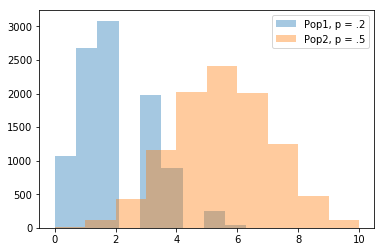

In [89]:
pop1 = np.random.binomial(10, .2, 10000)
pop2 = np.random.binomial(10, .5, 10000)

plt.hist(pop1, alpha = .4, label ='Pop1, p = .2')
plt.hist(pop2, alpha = .4, label ='Pop2, p = .5')
plt.legend(loc = 'upper right')

mu_1= 2.092 	 sigma_1= 1.27182388718
mu_2= 4.959 	 sigma_2= 1.65508881937
calculated t statistic:  43.4351314032
Ttest_indResult(statistic=43.413408405403956, pvalue=1.5727744076110539e-285)


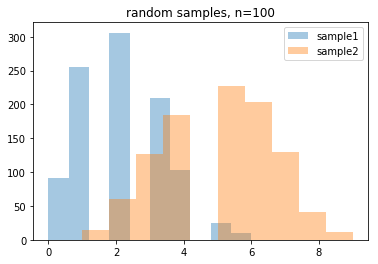

In [90]:
stats = sampling(pop1, pop2, 1000, 'y')

mu_1= 2.03 	 sigma_1= 1.29193653095
mu_2= 5.1 	 sigma_2= 1.62172747402
calculated t statistic:  14.8064042291
Ttest_indResult(statistic=14.732186196714975, pvalue=3.4251350554869045e-33)


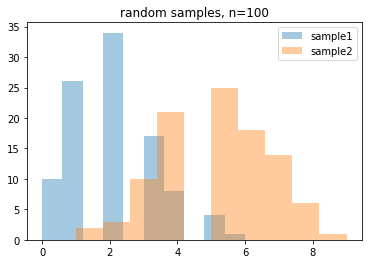

In [91]:
stats = sampling(pop1, pop2, 100, 'y')

mu_1= 1.7 	 sigma_1= 0.953939201417
mu_2= 5.45 	 sigma_2= 1.32193040664
calculated t statistic:  10.2874948062
Ttest_indResult(statistic=10.027009619976281, pvalue=9.0675353562395378e-12)


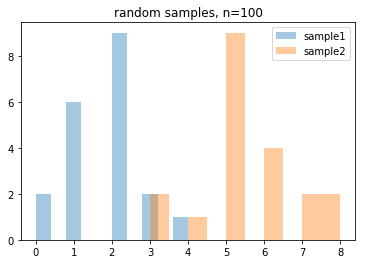

In [92]:
stats = sampling(pop1, pop2, 20, 'y')

The mean and standard deviation vary more as n decreases (which makes sense given an outlier has proportionally more clout in a smaller sample), and the t-statistic and p-value decrease (though in theory, an anomolous sampling could cause the n=20 run to have large t and p values).

In [93]:
def stats_on_stats(m,n):
    rows = []
    for ik in range(m):
        rows.append(sampling(pop1, pop2, n, 'n'))

    df = pd.DataFrame(rows)
    df = df.rename(index = str,columns= {0:'mean1', 1:'std1', 2:'mean2', 3:'std2', 4:'pvalue'})
    print(df.aggregate(np.mean))
    print(df.aggregate(np.std))
    return df

In [95]:
df_1000 = stats_on_stats(100,1000)

mean1      1.988530e+00
std1       1.248353e+00
mean2      5.021710e+00
std2       1.614674e+00
pvalue    9.835771e-291
dtype: float64
mean1     0.038365
std1      0.027598
mean2     0.051399
std2      0.032943
pvalue    0.000000
dtype: float64


In [96]:
df_100 = stats_on_stats(100,100)

mean1     1.974600e+00
std1      1.227212e+00
mean2     5.047100e+00
std2      1.594228e+00
pvalue    4.960188e-27
dtype: float64
mean1     1.163909e-01
std1      8.098688e-02
mean2     1.488979e-01
std2      1.083910e-01
pvalue    4.301444e-26
dtype: float64


In [97]:
df_20 = stats_on_stats(100,20)

mean1     2.031500
std1      1.230207
mean2     5.020000
std2      1.533985
pvalue    0.000046
dtype: float64
mean1     0.258907
std1      0.189907
mean2     0.406633
std2      0.232683
pvalue    0.000329
dtype: float64


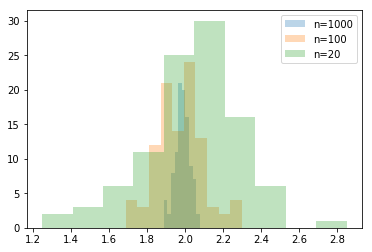

In [101]:
plt.hist(df_1000['mean1'], alpha= .3, label='n=1000')
plt.hist(df_100['mean1'], alpha= .3, label='n=100')
plt.hist(df_20['mean1'], alpha = .3, label='n=20')
plt.legend(loc = 'upper right')
plt.title('mean1')

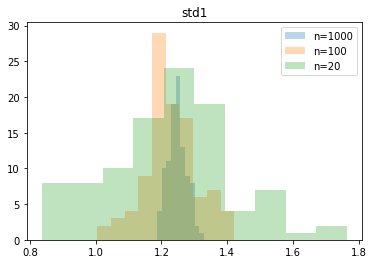

In [102]:
plt.hist(df_1000['std1'], alpha= .3, label='n=1000')
plt.hist(df_100['std1'], alpha= .3, label='n=100')
plt.hist(df_20['std1'], alpha = .3, label='n=20')
plt.legend(loc = 'upper right')
plt.title('std1')

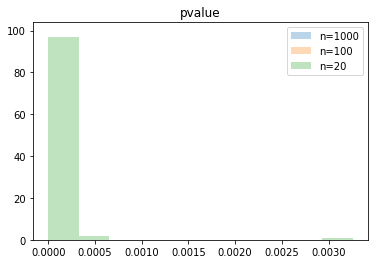

In [103]:
plt.hist(df_1000['pvalue'], alpha= .3, label='n=1000')
plt.hist(df_100['pvalue'], alpha= .3, label='n=100')
plt.hist(df_20['pvalue'], alpha = .3, label='n=20')
plt.legend(loc = 'upper right')
plt.title('pvalue')

There is more variation in the statistics as n decreases, which makes sense given that outliers have more clout in small sample sizes, and p values increase, which also makes sense because depending on the sampling at n=20 two populations could be randomly chosen to overlap more and thus have a p-value that reflects a higher probability that they were picked from the same parent population 

In [11]:
means = np.array([sample2.mean(), sample1.mean()])
sd = np.array([sample2.std(), sample1.std()])
size = np.array([len(sample2), len(sample1)])

se = (sum(sd **2 /size) )**(1/2)
t_stat = (sample2.mean()-sample1.mean())/se
print(t_stat)

14.9641290838
